# COGS 108 - Final Project

## Team
- Vivian Pham
    - PID: A12692885
    - Contributions:
- Denzel Rodil
    - PID:
    - Contributions:
- Aaron Truong
    - PID:
    - Contributions:
- Angela Zhu
    - PID:
    - Contributions:
- Gigi Li
    - PID:
    - Contributions:
- Rui Qin
    - PID:
    - Contributions:

## Introduction and Background




In [1]:
# Imports for data
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import patsy
# import statsmodels.api as sm
# import scipy.stats as stats
# from scipy.stats import ttest_ind, chisquare, normaltest

# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

## Data

### Description (Dataset 1)
Link: https://catalog.data.gov/dataset/crime-data-from-2010-to-present

Description: Number of crimes in Los Angeles, California starting from 2010
Source: data.lacity.org

In [2]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv')
cols = ['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred', 'Area ID', 'Area Name', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Location ']
df = df[cols]
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Location
0,11401303,09/13/2010,09/12/2010,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(33.9599, -118.3962)"
1,70309629,08/09/2010,08/09/2010,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,"(34.0224, -118.2524)"
2,100100508,01/08/2010,01/07/2010,2005,1,Central,182,330,BURGLARY FROM VEHICLE,"(34.0389, -118.2643)"
3,100100511,01/09/2010,01/06/2010,2100,1,Central,132,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0538, -118.2488)"
4,100100523,01/15/2010,01/15/2010,245,1,Central,182,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(34.0409, -118.2609)"
5,100100552,01/23/2010,01/23/2010,1225,1,Central,192,237,CHILD NEGLECT (SEE 300 W.I.C.),"(34.0401, -118.2668)"
6,100100562,01/28/2010,01/28/2010,2345,1,Central,152,626,INTIMATE PARTNER - SIMPLE ASSAULT,"(34.0502, -118.254)"
7,100100575,02/01/2010,01/31/2010,1720,1,Central,181,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0437, -118.2652)"
8,100100610,02/11/2010,02/10/2010,1800,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),"(34.048, -118.2577)"
9,100100616,02/11/2010,02/11/2010,1515,1,Central,192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0389, -118.2643)"


In [3]:
dates = {}

def groupby_year():
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        year = date_occurred[-4:]

        if year in dates:
            dates[year].append(row)
        else:
            dates[year] = [row]

groupby_year()

In [4]:
def groupby_month(df):
    months = {}
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        month = date_occurred[:2]

        if month in months:
            months[month].append(row)
        else:
            months[month] = [row]
    return months

#### Crimes in 2010

In [5]:
crimes_2010_year = pd.DataFrame(data=dates['2010'])
crimes_2010_months = {}

# year 2010
crimes_2010_months = groupby_month(crimes_2010_year)
crimes_2010_01 = pd.DataFrame(data=(crimes_2010_months['01']))
crimes_2010_02 = pd.DataFrame(data=(crimes_2010_months['02']))
crimes_2010_03 = pd.DataFrame(data=(crimes_2010_months['03']))
crimes_2010_04 = pd.DataFrame(data=(crimes_2010_months['04']))
crimes_2010_05 = pd.DataFrame(data=(crimes_2010_months['05']))
crimes_2010_06 = pd.DataFrame(data=(crimes_2010_months['06']))
crimes_2010_07 = pd.DataFrame(data=(crimes_2010_months['07']))
crimes_2010_08 = pd.DataFrame(data=(crimes_2010_months['08']))
crimes_2010_09 = pd.DataFrame(data=(crimes_2010_months['09']))
crimes_2010_10 = pd.DataFrame(data=(crimes_2010_months['10']))
crimes_2010_11 = pd.DataFrame(data=(crimes_2010_months['11']))
crimes_2010_12 = pd.DataFrame(data=(crimes_2010_months['12']))

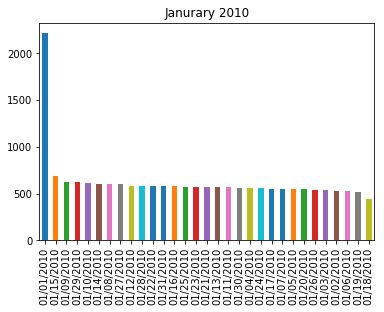

In [6]:
crimes_2010_01['Date Occurred'].value_counts().plot(kind='bar', title='Janurary 2010')

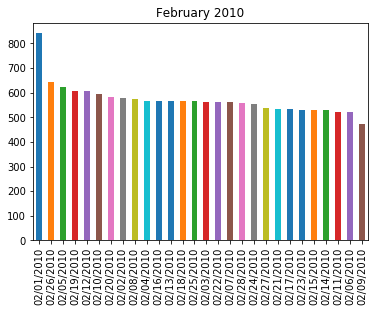

In [7]:
crimes_2010_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2010')

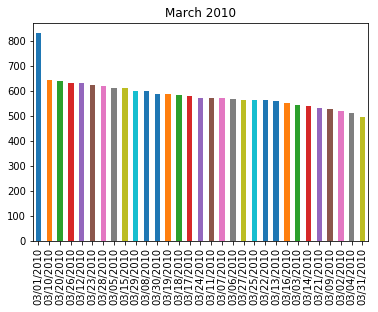

In [8]:
crimes_2010_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2010')

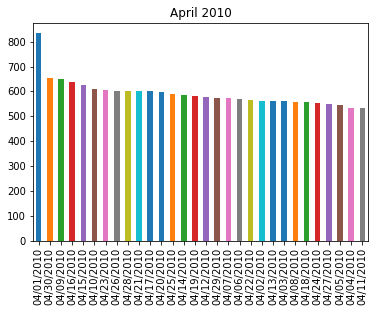

In [9]:
crimes_2010_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2010')

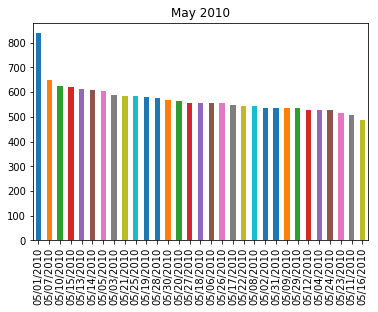

In [10]:
crimes_2010_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2010')

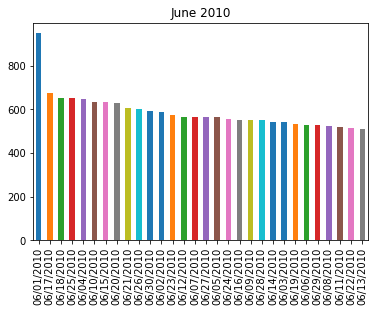

In [11]:
crimes_2010_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2010')

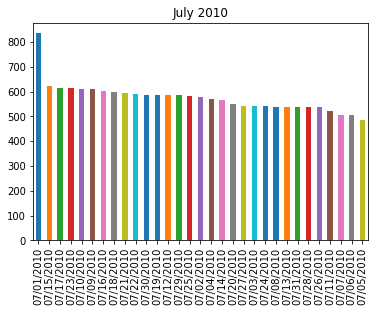

In [12]:
crimes_2010_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2010')

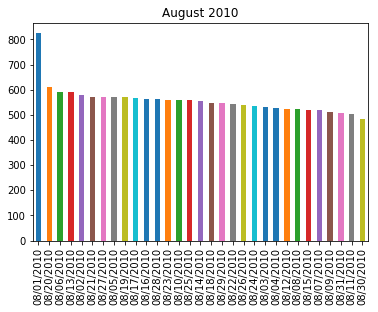

In [13]:
crimes_2010_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2010')

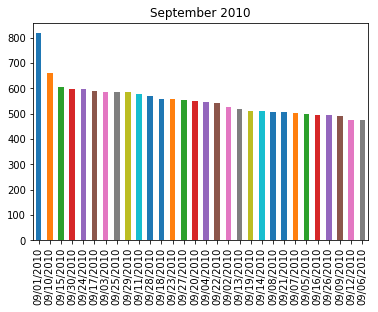

In [14]:
crimes_2010_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2010')

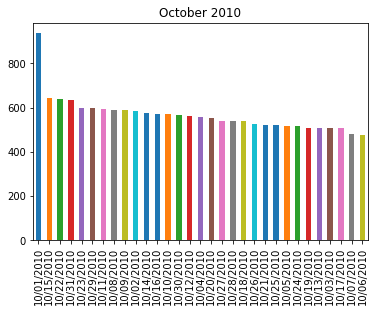

In [15]:
crimes_2010_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2010')

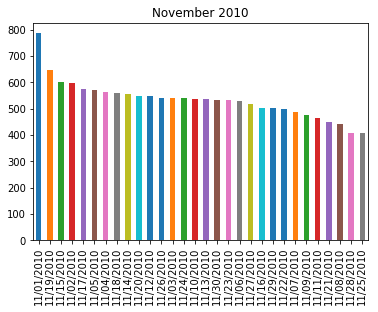

In [16]:
crimes_2010_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2010')

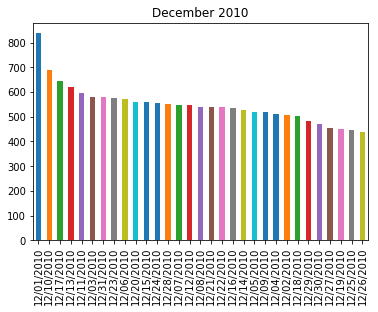

In [17]:
crimes_2010_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2010')

#### Crimes in 2011

In [18]:
crimes_2011_year = pd.DataFrame(data=dates['2011'])
crimes_2011_months = {}

# year 2011
crimes_2011_months = groupby_month(crimes_2011_year)
crimes_2011_01 = pd.DataFrame(data=(crimes_2011_months['01']))
crimes_2011_02 = pd.DataFrame(data=(crimes_2011_months['02']))
crimes_2011_03 = pd.DataFrame(data=(crimes_2011_months['03']))
crimes_2011_04 = pd.DataFrame(data=(crimes_2011_months['04']))
crimes_2011_05 = pd.DataFrame(data=(crimes_2011_months['05']))
crimes_2011_06 = pd.DataFrame(data=(crimes_2011_months['06']))
crimes_2011_07 = pd.DataFrame(data=(crimes_2011_months['07']))
crimes_2011_08 = pd.DataFrame(data=(crimes_2011_months['08']))
crimes_2011_09 = pd.DataFrame(data=(crimes_2011_months['09']))
crimes_2011_10 = pd.DataFrame(data=(crimes_2011_months['10']))
crimes_2011_11 = pd.DataFrame(data=(crimes_2011_months['11']))
crimes_2011_12 = pd.DataFrame(data=(crimes_2011_months['12']))

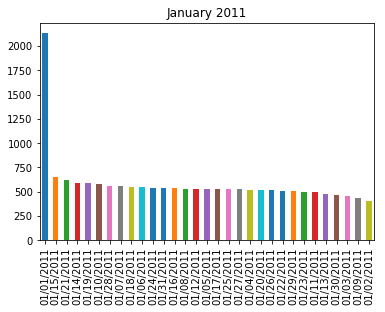

In [ ]:
crimes_2011_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2011')

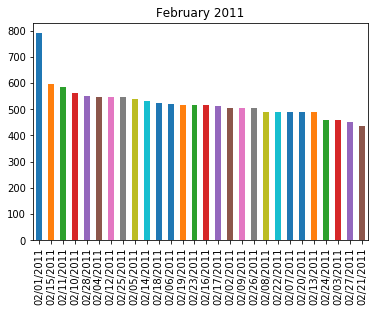

In [ ]:
crimes_2011_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2011')

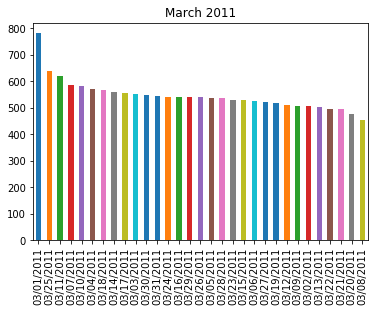

In [ ]:
crimes_2011_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2011')

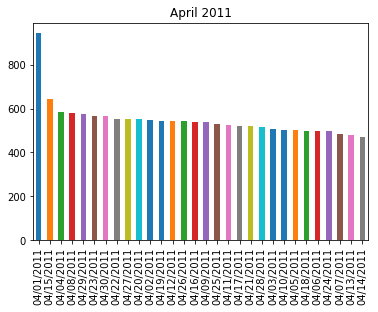

In [ ]:
crimes_2011_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2011')

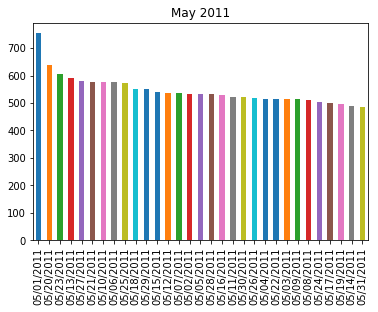

In [ ]:
crimes_2011_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2011')

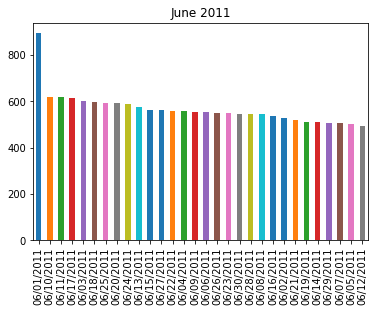

In [ ]:
crimes_2011_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2011')

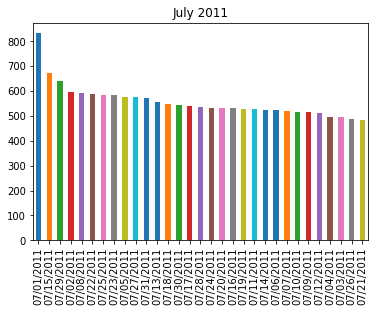

In [ ]:
crimes_2011_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2011')

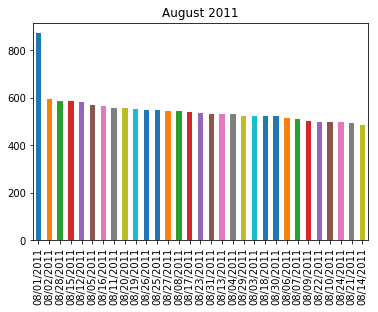

In [ ]:
crimes_2011_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2011')

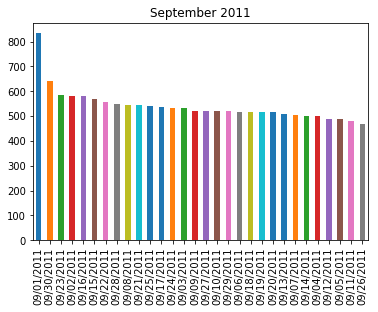

In [ ]:
crimes_2011_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2011')

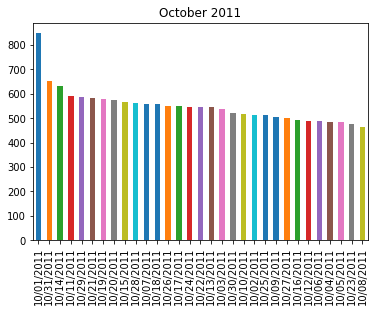

In [ ]:
crimes_2011_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2011')

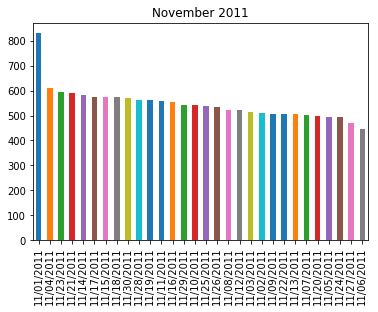

In [ ]:
crimes_2011_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2011')

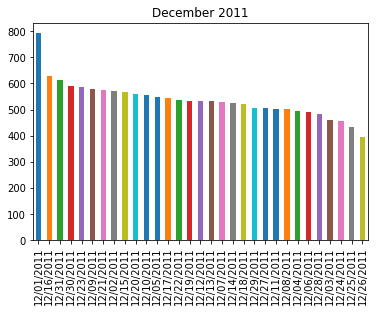

In [ ]:
crimes_2011_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2011')

#### Crimes in 2012

In [ ]:
crimes_2012_year = pd.DataFrame(data=dates['2012'])
crimes_2012_months = {}

# year 2012
crimes_2012_months = groupby_month(crimes_2012_year)
crimes_2012_01 = pd.DataFrame(data=(crimes_2012_months['01']))
crimes_2012_02 = pd.DataFrame(data=(crimes_2012_months['02']))
crimes_2012_03 = pd.DataFrame(data=(crimes_2012_months['03']))
crimes_2012_04 = pd.DataFrame(data=(crimes_2012_months['04']))
crimes_2012_05 = pd.DataFrame(data=(crimes_2012_months['05']))
crimes_2012_06 = pd.DataFrame(data=(crimes_2012_months['06']))
crimes_2012_07 = pd.DataFrame(data=(crimes_2012_months['07']))
crimes_2012_08 = pd.DataFrame(data=(crimes_2012_months['08']))
crimes_2012_09 = pd.DataFrame(data=(crimes_2012_months['09']))
crimes_2012_10 = pd.DataFrame(data=(crimes_2012_months['10']))
crimes_2012_11 = pd.DataFrame(data=(crimes_2012_months['11']))
crimes_2012_12 = pd.DataFrame(data=(crimes_2012_months['12']))

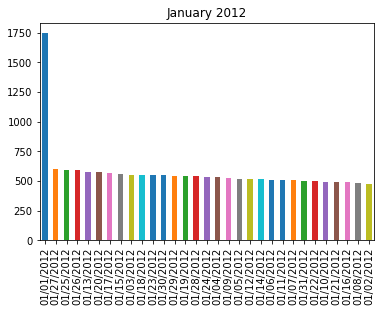

In [ ]:
crimes_2012_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2012')

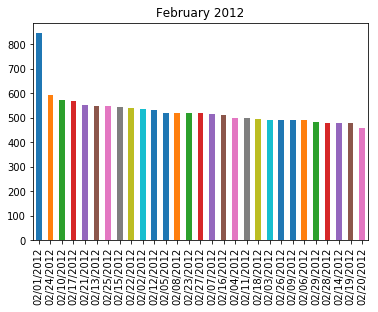

In [ ]:
crimes_2012_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2012')

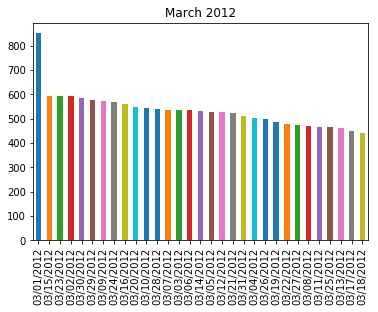

In [ ]:
crimes_2012_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2012')

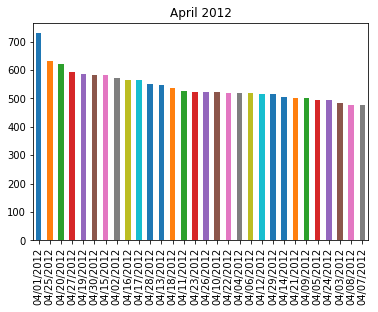

In [ ]:
crimes_2012_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2012')

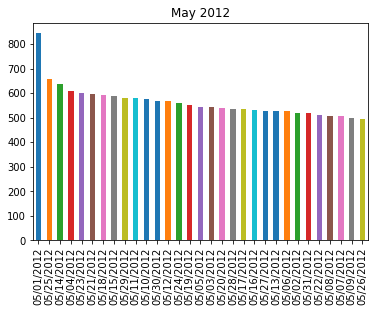

In [ ]:
crimes_2012_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2012')

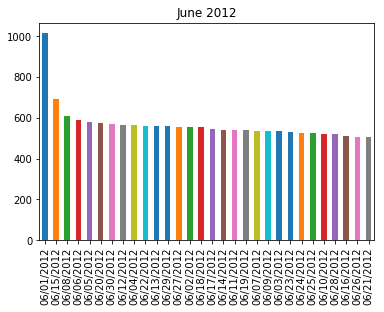

In [ ]:
crimes_2012_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2012')

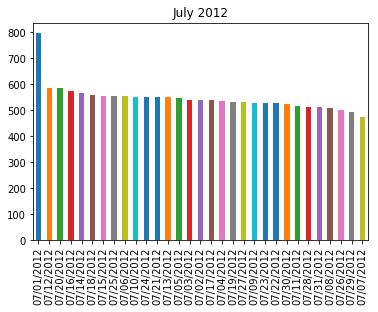

In [ ]:
crimes_2012_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2012')

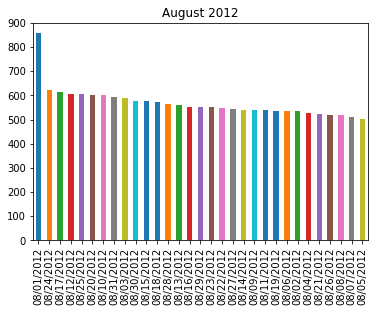

In [ ]:
crimes_2012_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2012')

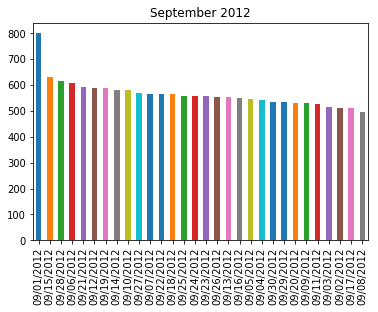

In [ ]:
crimes_2012_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2012')

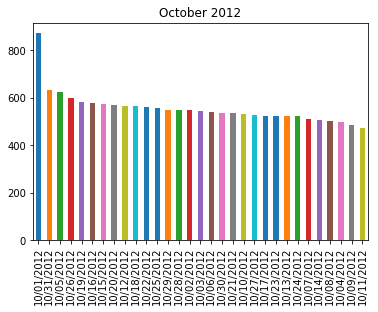

In [ ]:
crimes_2012_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2012')

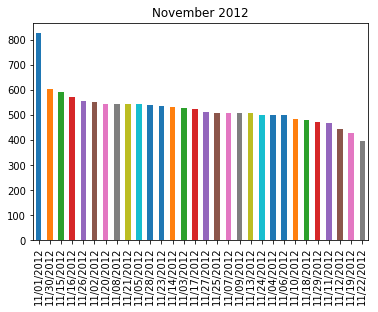

In [ ]:
crimes_2012_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2012')

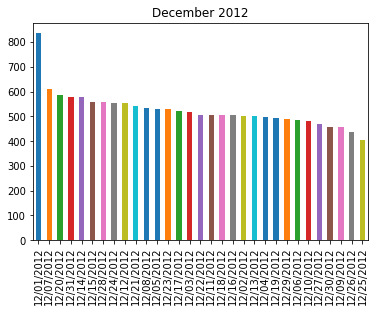

In [ ]:
crimes_2012_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2012')

#### Crimes in 2013

In [ ]:
crimes_2013_year = pd.DataFrame(data=dates['2013'])
crimes_2013_months = {}

# year 2013
crimes_2013_months = groupby_month(crimes_2013_year)
crimes_2013_01 = pd.DataFrame(data=(crimes_2013_months['01']))
crimes_2013_02 = pd.DataFrame(data=(crimes_2013_months['02']))
crimes_2013_03 = pd.DataFrame(data=(crimes_2013_months['03']))
crimes_2013_04 = pd.DataFrame(data=(crimes_2013_months['04']))
crimes_2013_05 = pd.DataFrame(data=(crimes_2013_months['05']))
crimes_2013_06 = pd.DataFrame(data=(crimes_2013_months['06']))
crimes_2013_07 = pd.DataFrame(data=(crimes_2013_months['07']))
crimes_2013_08 = pd.DataFrame(data=(crimes_2013_months['08']))
crimes_2013_09 = pd.DataFrame(data=(crimes_2013_months['09']))
crimes_2013_10 = pd.DataFrame(data=(crimes_2013_months['10']))
crimes_2013_11 = pd.DataFrame(data=(crimes_2013_months['11']))
crimes_2013_12 = pd.DataFrame(data=(crimes_2013_months['12']))

In [ ]:
crimes_2013_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2013')

In [ ]:
crimes_2013_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2013')

In [ ]:
crimes_2013_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2013')

In [ ]:
crimes_2013_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2013')

In [ ]:
crimes_2013_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2013')

In [ ]:
crimes_2013_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2013')

In [ ]:
crimes_2013_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2013')

In [ ]:
crimes_2013_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2013')

In [ ]:
crimes_2013_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2013')

In [ ]:
crimes_2013_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2013')

In [ ]:
crimes_2013_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2013')

In [ ]:
crimes_2013_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2013')

#### Crimes in 2014

In [ ]:
crimes_2014_year = pd.DataFrame(data=dates['2014'])
crimes_2014_months = {}

# year 2014
crimes_2014_months = groupby_month(crimes_2014_year)
crimes_2014_01 = pd.DataFrame(data=(crimes_2014_months['01']))
crimes_2014_02 = pd.DataFrame(data=(crimes_2014_months['02']))
crimes_2014_03 = pd.DataFrame(data=(crimes_2014_months['03']))
crimes_2014_04 = pd.DataFrame(data=(crimes_2014_months['04']))
crimes_2014_05 = pd.DataFrame(data=(crimes_2014_months['05']))
crimes_2014_06 = pd.DataFrame(data=(crimes_2014_months['06']))
crimes_2014_07 = pd.DataFrame(data=(crimes_2014_months['07']))
crimes_2014_08 = pd.DataFrame(data=(crimes_2014_months['08']))
crimes_2014_09 = pd.DataFrame(data=(crimes_2014_months['09']))
crimes_2014_10 = pd.DataFrame(data=(crimes_2014_months['10']))
crimes_2014_11 = pd.DataFrame(data=(crimes_2014_months['11']))
crimes_2014_12 = pd.DataFrame(data=(crimes_2014_months['12']))

In [ ]:
crimes_2014_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2014')

In [ ]:
crimes_2014_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2014')

In [ ]:
crimes_2014_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2014')

In [ ]:
crimes_2014_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2014')

In [ ]:
crimes_2014_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2014')

In [ ]:
crimes_2014_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2014')

In [ ]:
crimes_2014_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2014')

In [ ]:
crimes_2014_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2014')

In [ ]:
crimes_2014_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2014')

In [ ]:
crimes_2014_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2014')

In [ ]:
crimes_2014_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2014')

In [ ]:
crimes_2014_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2014')

#### Crimes in 2015

In [ ]:
crimes_2015_year = pd.DataFrame(data=dates['2015'])
crimes_2015_months = {}

# year 2015
crimes_2015_months = groupby_month(crimes_2015_year)
crimes_2015_01 = pd.DataFrame(data=(crimes_2015_months['01']))
crimes_2015_02 = pd.DataFrame(data=(crimes_2015_months['02']))
crimes_2015_03 = pd.DataFrame(data=(crimes_2015_months['03']))
crimes_2015_04 = pd.DataFrame(data=(crimes_2015_months['04']))
crimes_2015_05 = pd.DataFrame(data=(crimes_2015_months['05']))
crimes_2015_06 = pd.DataFrame(data=(crimes_2015_months['06']))
crimes_2015_07 = pd.DataFrame(data=(crimes_2015_months['07']))
crimes_2015_08 = pd.DataFrame(data=(crimes_2015_months['08']))
crimes_2015_09 = pd.DataFrame(data=(crimes_2015_months['09']))
crimes_2015_10 = pd.DataFrame(data=(crimes_2015_months['10']))
crimes_2015_11 = pd.DataFrame(data=(crimes_2015_months['11']))
crimes_2015_12 = pd.DataFrame(data=(crimes_2015_months['12']))

In [ ]:
crimes_2015_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2015')

In [ ]:
crimes_2015_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2015')

In [ ]:
crimes_2015_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2015')

In [ ]:
crimes_2015_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2015')

In [ ]:
crimes_2015_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2015')

In [ ]:
crimes_2015_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2015')

In [ ]:
crimes_2015_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2015')

In [ ]:
crimes_2015_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2015')

In [ ]:
crimes_2015_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2015')

In [ ]:
crimes_2015_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2015')

In [ ]:
crimes_2015_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2015')

In [ ]:
crimes_2015_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2015')

#### Crimes in 2016

In [ ]:
crimes_2016_year = pd.DataFrame(data=dates['2016'])
crimes_2016_months = {}

# year 2016
crimes_2016_months = groupby_month(crimes_2016_year)
crimes_2016_01 = pd.DataFrame(data=(crimes_2016_months['01']))
crimes_2016_02 = pd.DataFrame(data=(crimes_2016_months['02']))
crimes_2016_03 = pd.DataFrame(data=(crimes_2016_months['03']))
crimes_2016_04 = pd.DataFrame(data=(crimes_2016_months['04']))
crimes_2016_05 = pd.DataFrame(data=(crimes_2016_months['05']))
crimes_2016_06 = pd.DataFrame(data=(crimes_2016_months['06']))
crimes_2016_07 = pd.DataFrame(data=(crimes_2016_months['07']))
crimes_2016_08 = pd.DataFrame(data=(crimes_2016_months['08']))
crimes_2016_09 = pd.DataFrame(data=(crimes_2016_months['09']))
crimes_2016_10 = pd.DataFrame(data=(crimes_2016_months['10']))
crimes_2016_11 = pd.DataFrame(data=(crimes_2016_months['11']))
crimes_2016_12 = pd.DataFrame(data=(crimes_2016_months['12']))

In [ ]:
crimes_2016_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2016')

In [ ]:
crimes_2016_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2016')

In [ ]:
crimes_2016_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2016')

In [ ]:
crimes_2016_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2016')

In [ ]:
crimes_2016_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2016')

In [ ]:
crimes_2016_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2016')

In [ ]:
crimes_2016_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2016')

In [ ]:
crimes_2016_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2016')

In [ ]:
crimes_2016_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2016')

In [ ]:
crimes_2016_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2016')

In [ ]:
crimes_2016_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2016')

In [ ]:
crimes_2016_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2016')

#### Crimes in 2017

In [ ]:
crimes_2017_year = pd.DataFrame(data=dates['2017'])
crimes_2017_months = {}

# year 2017
crimes_2017_months = groupby_month(crimes_2017_year)
crimes_2017_01 = pd.DataFrame(data=(crimes_2017_months['01']))
crimes_2017_02 = pd.DataFrame(data=(crimes_2017_months['02']))
crimes_2017_03 = pd.DataFrame(data=(crimes_2017_months['03']))
crimes_2017_04 = pd.DataFrame(data=(crimes_2017_months['04']))
crimes_2017_05 = pd.DataFrame(data=(crimes_2017_months['05']))
crimes_2017_06 = pd.DataFrame(data=(crimes_2017_months['06']))
crimes_2017_07 = pd.DataFrame(data=(crimes_2017_months['07']))
crimes_2017_08 = pd.DataFrame(data=(crimes_2017_months['08']))
crimes_2017_09 = pd.DataFrame(data=(crimes_2017_months['09']))
crimes_2017_10 = pd.DataFrame(data=(crimes_2017_months['10']))
crimes_2017_11 = pd.DataFrame(data=(crimes_2017_months['11']))
crimes_2017_12 = pd.DataFrame(data=(crimes_2017_months['12']))

In [ ]:
crimes_2017_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2017')

In [ ]:
crimes_2017_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2017')

In [ ]:
crimes_2017_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2017')

In [ ]:
crimes_2017_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2017')

In [ ]:
crimes_2017_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2017')

In [ ]:
crimes_2017_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2017')

In [ ]:
crimes_2017_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2017')

In [ ]:
crimes_2017_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2017')

In [ ]:
crimes_2017_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2017')

In [ ]:
crimes_2017_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2017')

In [ ]:
crimes_2017_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2017')

In [ ]:
crimes_2017_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2017')

#### Crimes in 2018

In [ ]:
crimes_2018_year = pd.DataFrame(data=dates['2018'])
crimes_2018_months = {}

# year 2018
crimes_2018_months = groupby_month(crimes_2018_year)
crimes_2018_01 = pd.DataFrame(data=(crimes_2018_months['01']))
crimes_2018_02 = pd.DataFrame(data=(crimes_2018_months['02']))
crimes_2018_03 = pd.DataFrame(data=(crimes_2018_months['03']))
crimes_2018_04 = pd.DataFrame(data=(crimes_2018_months['04']))
crimes_2018_05 = pd.DataFrame(data=(crimes_2018_months['05']))
crimes_2018_06 = pd.DataFrame(data=(crimes_2018_months['06']))
crimes_2018_07 = pd.DataFrame(data=(crimes_2018_months['07']))
crimes_2018_08 = pd.DataFrame(data=(crimes_2018_months['08']))
crimes_2018_09 = pd.DataFrame(data=(crimes_2018_months['09']))
crimes_2018_10 = pd.DataFrame(data=(crimes_2018_months['10']))
crimes_2018_11 = pd.DataFrame(data=(crimes_2018_months['11']))
crimes_2018_12 = pd.DataFrame(data=(crimes_2018_months['12']))

In [ ]:
crimes_2018_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2018')

In [ ]:
crimes_2018_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2018')

In [ ]:
crimes_2018_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2018')

In [ ]:
crimes_2018_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2018')

In [ ]:
crimes_2018_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2018')

In [ ]:
crimes_2018_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2018')

In [ ]:
crimes_2018_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2018')

In [ ]:
crimes_2018_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2018')

In [ ]:
crimes_2018_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2018')

In [ ]:
crimes_2018_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2018')

In [ ]:
crimes_2018_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2018')

In [ ]:
crimes_2018_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2018')

#### Crimes in 2019

In [ ]:
crimes_2019_year = pd.DataFrame(data=dates['2019'])
crimes_2019_months = {}

# year 2019
crimes_2019_months = groupby_month(crimes_2019_year)
crimes_2019_01 = pd.DataFrame(data=(crimes_2019_months['01']))
crimes_2019_02 = pd.DataFrame(data=(crimes_2019_months['02']))
crimes_2019_03 = pd.DataFrame(data=(crimes_2019_months['03']))
crimes_2019_04 = pd.DataFrame(data=(crimes_2019_months['04']))
crimes_2019_05 = pd.DataFrame(data=(crimes_2019_months['05']))
crimes_2019_06 = pd.DataFrame(data=(crimes_2019_months['06']))
crimes_2019_07 = pd.DataFrame(data=(crimes_2019_months['07']))
crimes_2019_08 = pd.DataFrame(data=(crimes_2019_months['08']))
crimes_2019_09 = pd.DataFrame(data=(crimes_2019_months['09']))
crimes_2019_10 = pd.DataFrame(data=(crimes_2019_months['10']))
crimes_2019_11 = pd.DataFrame(data=(crimes_2019_months['11']))
crimes_2019_12 = pd.DataFrame(data=(crimes_2019_months['12']))

In [ ]:
crimes_2019_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2019')

In [ ]:
crimes_2019_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2019')

In [ ]:
crimes_2019_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2019')

In [ ]:
crimes_2019_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2019')

In [ ]:
crimes_2019_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2019')

In [ ]:
crimes_2019_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2019')

In [ ]:
crimes_2019_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2019')

In [ ]:
crimes_2019_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2019')

In [ ]:
crimes_2019_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2019')

In [ ]:
crimes_2019_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2019')

In [ ]:
crimes_2019_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2019')

In [ ]:
crimes_2019_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2019')

### Dataset 2 (probably don't need) 
Link: https://www.kaggle.com/kingburrito666/los-angeles-crime 

Description: Crime data in LA from 2012 to 2016 including time, location, and type of crime.

In [ ]:
# df2 = pd.read_csv('Crimes_2012-2016.csv')
# df2 = df2[['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd','CrmCd.Desc', 'Location.1']]
# df2.columns = ['Date Reported', 'DR Number', 'Date Occurred', 'Time Occurred', 'Area ID', 'Area Name', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Location ']
# df2 = df2.loc[:, cols]
# df2

In [ ]:
# pd.concat([df['DR Number'],df2['DR Number']]).drop_duplicates(keep=False)

### Data Analysis and Results

## Privacy and Ethical Considerations

## Conclusion and Discussion